# Custo de plano de saúde
- Péricles S. G. Marques
- https://www.linkedin.com/in/periclessavio/

### Objetivo:
Criar um modelo de regressão linear múltipla para prever os custos de plano de saúde

##### Carregar bibliotecas e dados

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
insurance = pd.read_csv('medical_insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##### Analidar os dados

In [11]:
print("O data set tem {} linhas e {} colunas".format(insurance.shape[0], insurance.shape[1]))

O data set tem 1338 linhas e 7 colunas


In [12]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
print("Checando se há dados nulos.")
insurance.isnull().sum()

Checando se há dados nulos.


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
print(insurance.dtypes)
print("\nAs variáveis 'sex', 'smoker' e 'region' são variáveis não numéricas.")

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

As variáveis 'sex', 'smoker' e 'region' são variáveis não numéricas.


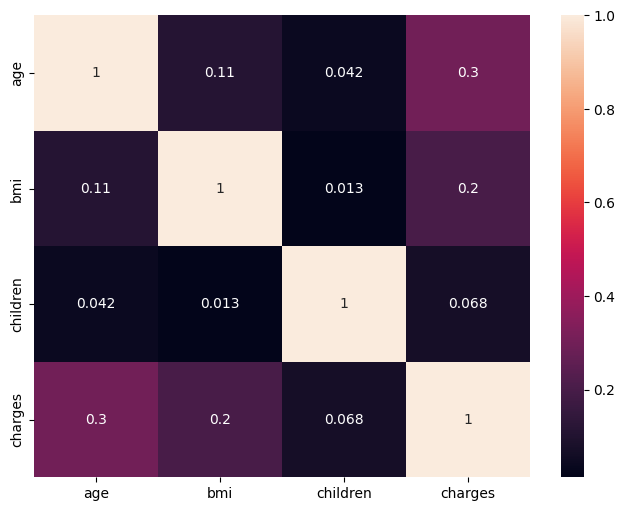

Verificando a correlação entre as variáveis quantitativas.


In [15]:
corr = insurance.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, annot= True)
plt.show()

print("Verificando a correlação entre as variáveis quantitativas.")

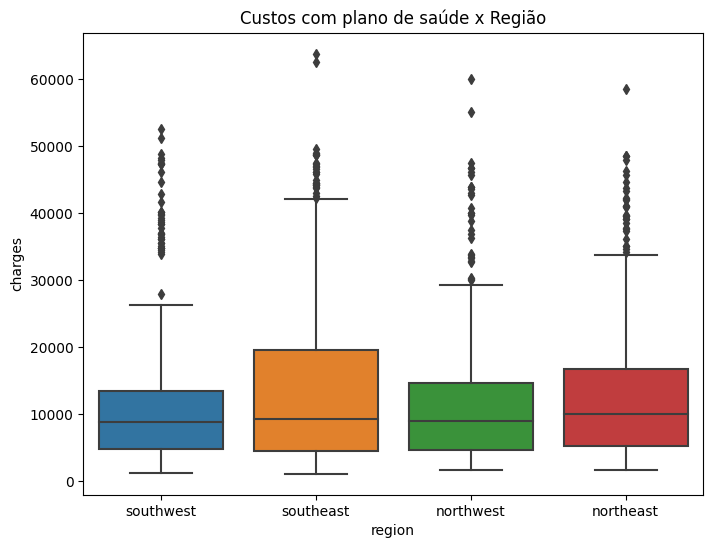

Não há diferenças significativas entre as regiões.


In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='region', y='charges', data=insurance).set(title='Custos com plano de saúde x Região')
plt.show()

print("Não há diferenças significativas entre as regiões.")

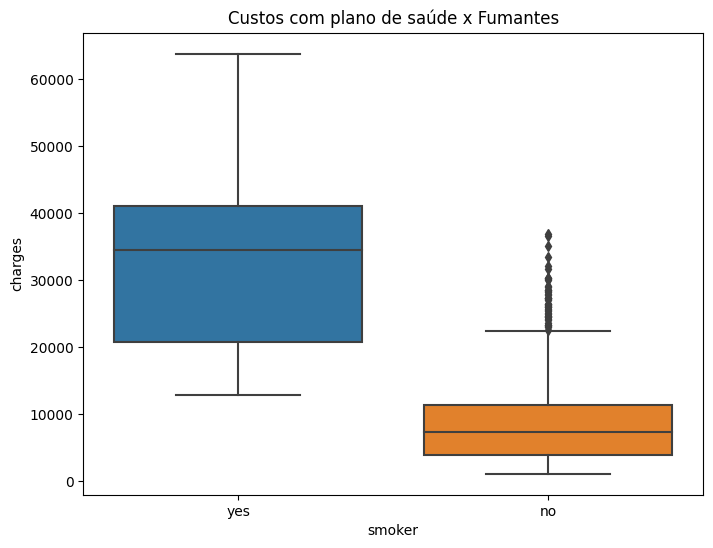

Pessoas que fumam gastam mais com o plano de saúde do que as que não fumam.


In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=insurance).set(title='Custos com plano de saúde x Fumantes')
plt.show()

print("Pessoas que fumam gastam mais com o plano de saúde do que as que não fumam.")

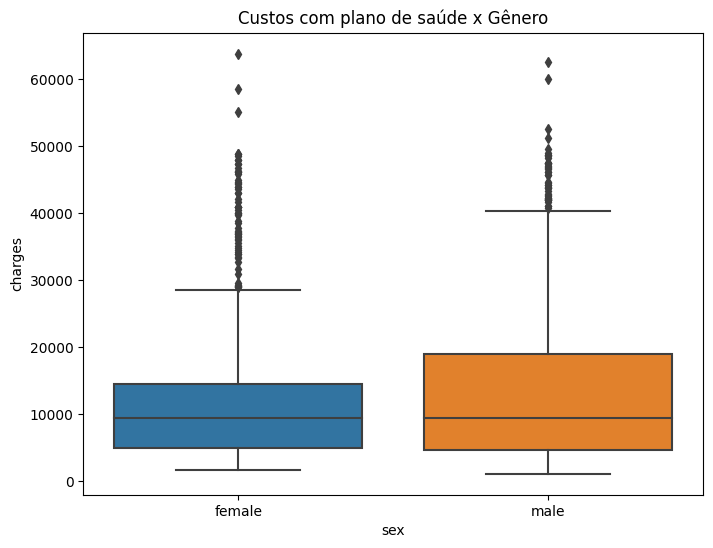

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='sex', y='charges', data=insurance).set(title='Custos com plano de saúde x Gênero')
plt.show()

Text(0.5, 1.0, 'Custos x Índice de massa corporal')

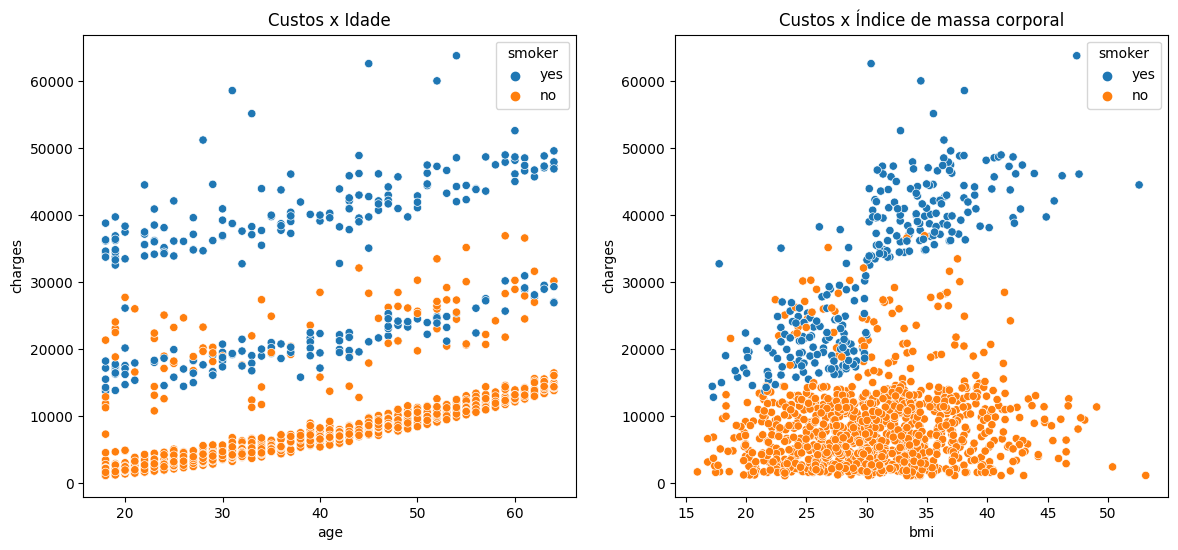

In [19]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age', y='charges', data=insurance, hue='smoker',ax=ax)
ax.set_title('Custos x Idade')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi', y='charges', data=insurance, hue='smoker')
ax.set_title('Custos x Índice de massa corporal')


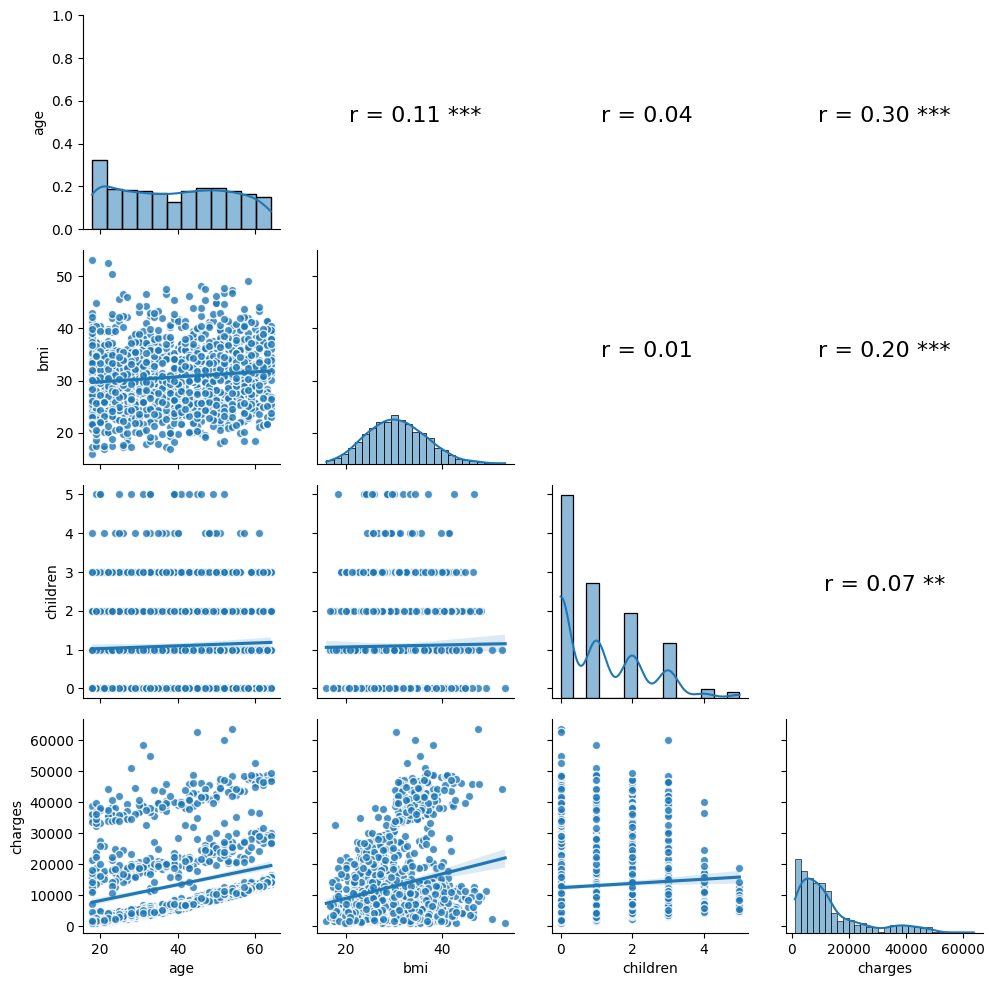

In [20]:
from scipy.stats import pearsonr
def reg_coef(x,y,label=None,color=None, **kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    if p < 0.01:
        sig_level = '***'
    elif p < 0.05:
        sig_level = '**'
    elif p < 0.05:
        sig_level = '*'
    else:
        sig_level = ''
        
    ax.annotate('r = {:.2f} {}'.format(r, sig_level), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.texts[0].set_size(16)
    ax.set_axis_off()

# Create the plot
g = sns.PairGrid(data=insurance, vars=["age", "bmi", "children", "charges"], hue=None)
g.map_upper(reg_coef)
g = g.map_lower(sns.regplot, scatter_kws={"edgecolor": "white"})
g = g.map_diag(sns.histplot, kde=True)
plt.show()

In [21]:
print("Transformar as variáveis categóricas em variáveis dummies\n")
# aplicar a função get_dummies() para criar as variáveis dummy
insurance_dummy = pd.get_dummies(insurance, columns=['sex', 'smoker', 'region'])

# exibir o novo dataframe com as variáveis dummy
insurance_dummy

Transformar as variáveis categóricas em variáveis dummies



,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [22]:
insurance_dummy.describe()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.505232,0.795217,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.500160,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Verificar a correlação das variáveis (dummy).


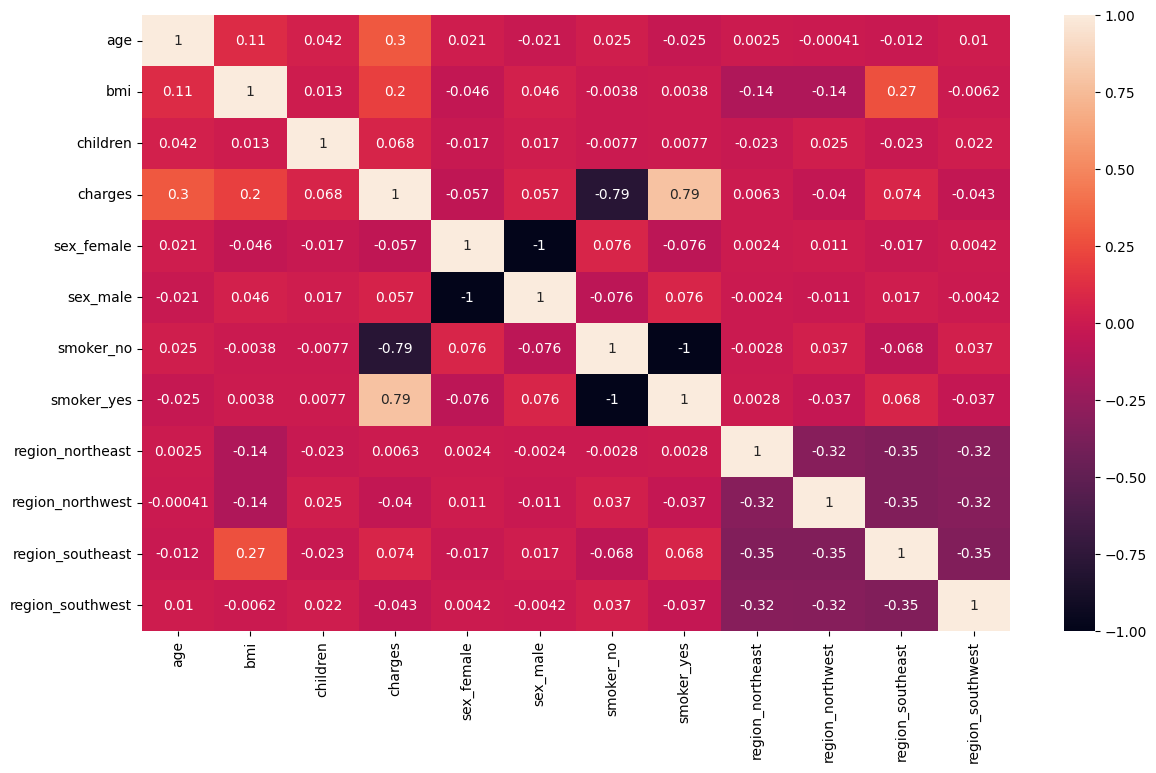

O custo do plano de saúde está fortemente relacionado com o hábito de fumar.


In [23]:
print("Verificar a correlação das variáveis (dummy).")
corr = insurance_dummy.corr()

fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(corr, annot= True)
plt.show()

print("O custo do plano de saúde está fortemente relacionado com o hábito de fumar.")

In [24]:
print('Verificar a normalidade dos dados')

from scipy.stats import shapiro

# iterar pelas colunas do dataframe e aplicar o teste Shapiro-Wilk
for col in insurance_dummy.columns:
    stat, p = shapiro(insurance_dummy[col])
    alpha = 0.05
    if p > alpha:
        print(f'{col} segue uma distribuição normal (p = {p:.4f})')
    else:
        print(f'{col} não segue uma distribuição normal (p = {p:.4f})')

Verificar a normalidade dos dados
age não segue uma distribuição normal (p = 0.0000)
bmi não segue uma distribuição normal (p = 0.0000)
children não segue uma distribuição normal (p = 0.0000)
charges não segue uma distribuição normal (p = 0.0000)
sex_female não segue uma distribuição normal (p = 0.0000)
sex_male não segue uma distribuição normal (p = 0.0000)
smoker_no não segue uma distribuição normal (p = 0.0000)
smoker_yes não segue uma distribuição normal (p = 0.0000)
region_northeast não segue uma distribuição normal (p = 0.0000)
region_northwest não segue uma distribuição normal (p = 0.0000)
region_southeast não segue uma distribuição normal (p = 0.0000)
region_southwest não segue uma distribuição normal (p = 0.0000)


In [25]:
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(insurance_dummy['charges'],alpha=0.05)

insurance_dummy['charges'] = y_bc
ci,lam

((-0.01140290617294196, 0.0988096859767545), 0.043649053770664956)

# WIP

#### Modelo

In [26]:
from sklearn.model_selection import train_test_split
X = insurance_dummy.drop('charges',axis=1) # Independet variable
y = insurance_dummy['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [31]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [33]:
print(modelo.intercept_)
print(modelo.coef_)
print(modelo.score(X_test, y_test))

9.186061349199626
[ 0.04827816  0.02124078  0.14622909  0.04956731 -0.04956731 -1.1671772
  1.1671772   0.12338306  0.04206861 -0.08856059 -0.07689108]
0.7782997842340319


In [38]:
import numpy as np
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

In [39]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [40]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,-1.207911e+17,9.186061
1,theta_1,age,4.055684e-01,0.048278
2,theta_2,bmi,-5.964478e+00,0.021241
3,theta_3,children,-1.230830e+00,0.146229
4,theta_4,sex_female,1.293220e+17,0.049567
5,theta_5,sex_male,1.293220e+17,-0.049567
6,theta_6,smoker_no,-8.530928e+15,-1.167177
7,theta_7,smoker_yes,-8.530928e+15,1.167177
8,theta_8,region_northeast,-9.600000e+01,0.123383
9,theta_9,region_northwest,-9.600000e+01,0.042069


In [41]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  1286.765778217075
R square obtain for normal equation method is : -687.4555430140255


In [42]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  0.41437134694574984
R square obtain for scikit learn library is : 0.7782997842340319


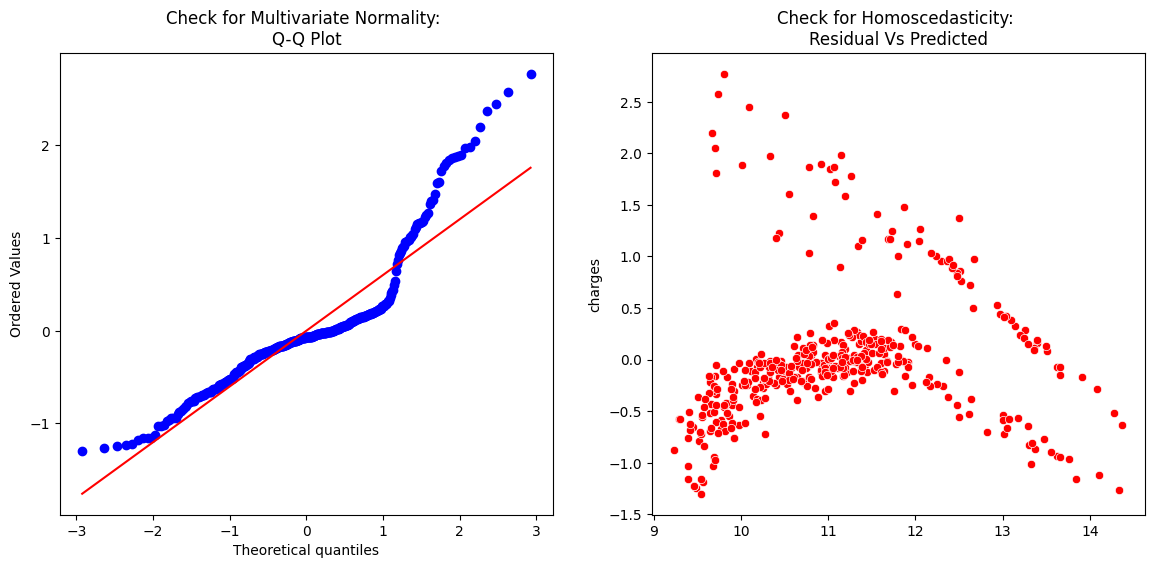

In [44]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [45]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

4.510595519923279

# Referências
- https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial/notebook
- https://www.kaggle.com/code/mariapushkareva/medical-insurance-cost-with-linear-regression
- https://www.kaggle.com/code/grosvenpaul/regression-eda-and-statistics-tutorial
- https://www.kaggle.com/code/ruslankl/health-care-cost-prediction-w-linear-regression

In [30]:
import statsmodels.api as sm # biblioteca de modelagem estatística

# In[ ]: Estimando um modelo múltiplo com as variáveis do dataset 'paises'

#Estimando a regressão múltipla
modelo_paises = sm.OLS.from_formula("charges ~ smoker_no + smoker_yes + age + bmi", insurance_dummy).fit()

#	children	charges	sex_female	sex_male		region_northeast	region_northwest	region_southeast	region_southwest

#Parâmetros do modelo
modelo_paises.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     1350.
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        14:46:41   Log-Likelihood:                -1141.3
No. Observations:                1338   AIC:                             2291.
Df Residuals:                    1334   BIC:                             2311.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0576      0.150     47.163      0.000       6.764       7.351
smoker_no     -0.1142      0.002    -46.993      0.000      -0.119      -0.109
smoker_yes     1.0399      0.022     47.207      0.000       0.997       1.083
age            0.1724      0.004     38.818      0.000       0.164       0.181
bmi            0.0995      0.018      5.674      0.000       0.065       0.134
==============================================================================
Omnibus:                      417.000   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1375.861
Skew:                           1.531   Prob(JB):                    1.72e-299
Kurtosis:                       6.913   Cond. No.                     5.99e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.65e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""